In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib import patheffects

In [25]:
df = pd.read_csv('df6.csv')

In [26]:
df

,d.cod_familiar_fam,TP-04,TP-05,TP-06,TP-07,TC-09,TC-10,TC-12,qnt_comodos,vlr_TP-04,...,T_TP-04,T_TP-05,T_TP-06,T_TP-07,T_TC-09,T_TC-10,T_TC-12,cep,bairro,rpa
0,1400492076,1,1,1,1,1,0,1,1,"2161,15",...,"2161,15","716,05","854,43","1995,82","12094,26",0,"5579,95",50030260,RECIFE,1
1,2140097424,1,1,1,1,1,0,1,1,"2161,15",...,"2161,15","716,05","854,43","1995,82","12094,26",0,"5579,95",50110065,SANTO AMARO,1
2,2290169366,1,1,1,1,1,0,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64","12094,26",0,"5579,95",51160240,IMBIRIBEIRA,6
3,2335441000,1,1,1,1,1,0,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64","12094,26",0,"5579,95",50770601,AFOGADOS,5
4,2365855334,1,1,1,1,1,0,1,1,"2161,15",...,"2161,15","716,05","854,43","1995,82","12094,26",0,"5579,95",50110557,SANTO AMARO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149,6114302664,1,1,1,1,0,1,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64",0,"4334,79","5579,95",50790620,CURADO,5
6150,1618078283,1,1,1,1,0,1,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64",0,"4334,79","5579,95",51310080,COHAB,6
6151,994951043,1,1,1,1,0,1,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64",0,"4334,79","5579,95",50761550,SAN MARTIN,5
6152,5415208143,1,1,1,1,0,1,1,2,"2161,15",...,"2161,15","716,05","1708,86","3991,64",0,"4334,79","5579,95",51210902,IBURA,6


In [31]:
df['vlr_obra'] = df['vlr_obra'].str.replace(',', '.')
df['vlr_obra'] = df['vlr_obra'].astype('float')

In [32]:
df.groupby('rpa').agg({'vlr_obra': 'sum'})

,vlr_obra
rpa,
1,13695165.38
2,14163615.00
3,23555227.66
4,16660250.83
5,17074704.14
6,30233796.97


In [34]:
# Agrupando o DataFrame por RPA e trazendo o valor total gasto em cada um
df = df.groupby('rpa').agg({'vlr_obra':'sum'}).reset_index()

In [35]:
recife_map = gpd.read_file('bairros-polygon.shp')

In [36]:
recife_map.rename(columns={'bairro_nom': 'bairro'}, inplace=True)

In [37]:
recife_map = recife_map[['rpa','geometry']]

In [38]:
# Função "dissolve" do geopandas que agrupa as coordenadas dos bairros e monta uma região
rpa = recife_map.dissolve(by='rpa')

In [39]:
rpa = rpa.merge(df, on='rpa')

In [40]:
rpa

,rpa,geometry,vlr_obra
0,1,"POLYGON ((-34.88841 -8.08176, -34.88927 -8.082...",13695165.38
1,2,"POLYGON ((-34.88680 -8.04043, -34.88680 -8.040...",14163615.00
2,3,"POLYGON ((-34.92194 -8.04083, -34.92261 -8.040...",23555227.66
3,4,"POLYGON ((-34.93012 -8.06176, -34.93013 -8.061...",16660250.83
4,5,"POLYGON ((-34.92787 -8.10244, -34.92806 -8.102...",17074704.14
5,6,"POLYGON ((-34.88267 -8.10041, -34.88301 -8.101...",30233796.97


<Axes: >

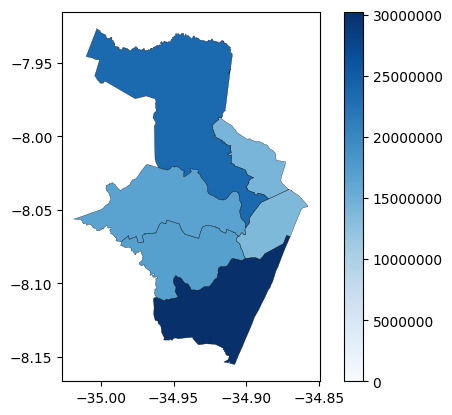

In [41]:
ax = rpa.plot(column='vlr_obra', legend=True, cmap='Blues',vmin = 0, legend_kwds={'format':"%.0f"})
ax.ticklabel_format(useOffset=False)
rpa.boundary.plot(ax=ax,linewidth=0.2,color='black')

In [43]:
rpa.vlr_final_domicilio = rpa['vlr_obra'].astype(str)

C:\Users\alexandre.goncalves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:205: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


In [44]:
rpa['vlr_final_domicilio']={0: 'R$ 13.695.165,38',
                           1: 'R$ 14.163.615,00',
                           2: 'R$ 23.555.227,66',
                           3: 'R$ 16.660.250,83',
                           4: 'R$ 17.074.704,14',
                           5: 'R$ 30.233.796,97'}

In [45]:
rpa

,rpa,geometry,vlr_obra,vlr_final_domicilio
0,1,"POLYGON ((-34.88841 -8.08176, -34.88927 -8.082...",13695165.38,"R$ 13.695.165,38"
1,2,"POLYGON ((-34.88680 -8.04043, -34.88680 -8.040...",14163615.00,"R$ 14.163.615,00"
2,3,"POLYGON ((-34.92194 -8.04083, -34.92261 -8.040...",23555227.66,"R$ 23.555.227,66"
3,4,"POLYGON ((-34.93012 -8.06176, -34.93013 -8.061...",16660250.83,"R$ 16.660.250,83"
4,5,"POLYGON ((-34.92787 -8.10244, -34.92806 -8.102...",17074704.14,"R$ 17.074.704,14"
5,6,"POLYGON ((-34.88267 -8.10041, -34.88301 -8.101...",30233796.97,"R$ 30.233.796,97"


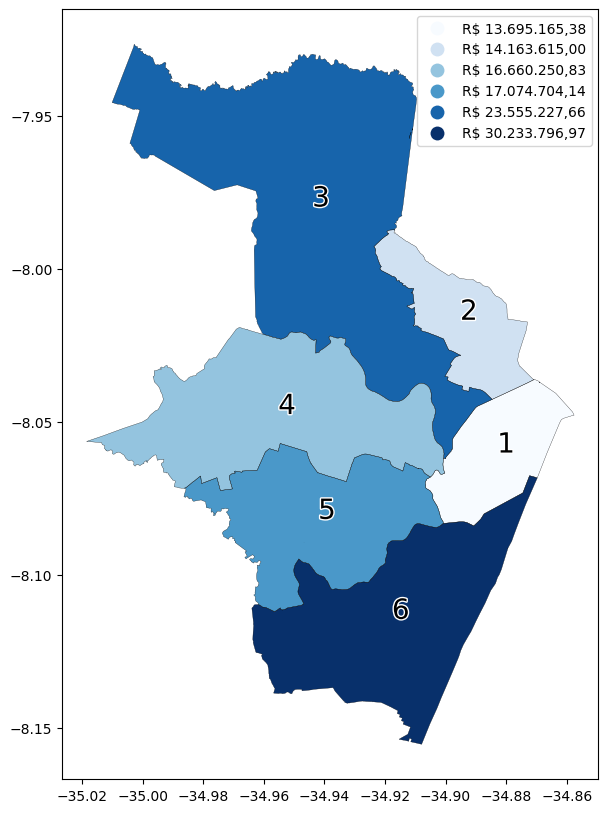

In [46]:
# plot do gráfico em formato de recife
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
rpa.plot(column='vlr_final_domicilio', legend=True, cmap='Blues',vmin = 0, ax = ax)
ax.ticklabel_format(useOffset=False)

# contorno do mapa para poder visualizar melhor as áreas
rpa.boundary.plot(ax=ax,linewidth=0.2,color='black')

# for para poder trazer o número do RPA sobreposto ao mapa
for index, row in rpa.iterrows():
    centroid = row['geometry'].centroid
    outline_effect = [patheffects.withStroke(linewidth=2, foreground="white")]
    ax.annotate(row['rpa'], xy=(centroid.x, centroid.y), color='black', fontsize=20, path_effects=outline_effect)